# Sentiment Analysis (**TF-IDF**) Using Naive Bayes and XGBoost

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

### Read the Dataset

In [2]:
data1 = pd.read_csv('1429_1.csv')
data1.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
data1['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

So there is a huge imbalnce in the data to the high rate classes

> **Solution:** Adding more data with low rate classes

In [5]:
data2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.rating' , 'reviews.text']]
# data2 = data2[data2["reviews.rating"]<=3]

data3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.rating' , 'reviews.text']]


In [6]:
data2['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [7]:
data3['reviews.rating'].value_counts()

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

In [8]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [9]:
data=pd.concat([data1, data2, data3])

In [10]:
df=pd.concat([data['reviews.text'],data['reviews.rating']], axis=1)
df.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


check indeses

In [11]:
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
4904,The battery is having more and more trouble ho...,2.0
4945,My daughter has had this tablet for almost 2 m...,3.0
4953,Very cheap and was not impressed at all never ...,1.0
4971,"Hard to use, Lots of ads, and Randomly closes ...",2.0


> need to reset index

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37761 entries, 0 to 4975
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    37760 non-null  object 
 1   reviews.rating  37728 non-null  float64
dtypes: float64(1), object(1)
memory usage: 885.0+ KB


In [13]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df=df.reset_index()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37727 entries, 0 to 37726
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           37727 non-null  int64  
 1   reviews.text    37727 non-null  object 
 2   reviews.rating  37727 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 884.4+ KB


In [17]:
df

,index,reviews.text,reviews.rating
0,0,This product so far has not disappointed. My c...,5.0
1,1,great for beginner or experienced person. Boug...,5.0
2,2,Inexpensive tablet for him to use and learn on...,5.0
3,3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,4,I bought this for my grand daughter when she c...,5.0
...,...,...,...
37722,4904,The battery is having more and more trouble ho...,2.0
37723,4945,My daughter has had this tablet for almost 2 m...,3.0
37724,4953,Very cheap and was not impressed at all never ...,1.0
37725,4971,"Hard to use, Lots of ads, and Randomly closes ...",2.0


In [18]:
df.drop(columns=['index'],inplace=True)

In [19]:
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
37722,The battery is having more and more trouble ho...,2.0
37723,My daughter has had this tablet for almost 2 m...,3.0
37724,Very cheap and was not impressed at all never ...,1.0
37725,"Hard to use, Lots of ads, and Randomly closes ...",2.0


In [20]:
df['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

## Data Preprocessing

In [21]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}
df['sentiment']=df['reviews.rating'].map(sentiment)

In [22]:
df['sentiment'].value_counts()

1    32315
0     5412
Name: sentiment, dtype: int64

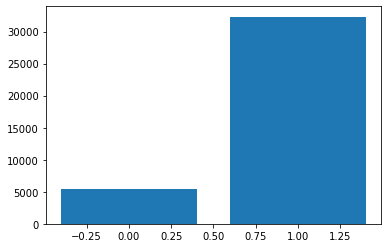

In [23]:
counts=df['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

There is still big diffrence between them

In [24]:
df[df['reviews.rating']==4]['reviews.text']

3        I've had my Fire HD 8 two weeks now and I love...
6        Great for e-reading on the go, nice and light ...
10       Not easy for elderly users cease of ads that p...
12       Wanted my father to have his first tablet and ...
16       nice reader. almost perfect for what i want/ne...
                               ...                        
34589    I was looking for ways to cut cost from a rais...
34590    I enjoy my kindle tv, it beats paying for cabl...
34593    Hey Alexa, Hey Alexa - Night and day it's Hey ...
34596    My new Kindle DX2 graphite came yesterday and ...
34607    Amazon already includes this cable with the Ki...
Name: reviews.text, Length: 8541, dtype: object

In [25]:
list(df[df['reviews.rating']==3]['reviews.text'])[0:5]

['I was hoping to use Google launcher with this tablet but it is really locked down and you cannot change the launcher or the lock screen. Still cheap and fine for watching movies.',
 'The tablet works fine. It is responsive with good resolution. It is too tied to Amazon. It requires too many hoops to get apps such as Zinio to work. Until Amazon loosens its grip, I recommend only at a very good price.',
 "Fine for reading, ...haven't used it for anything else yet",
 'Though I have got it for cheap price during black friday, this Fire is not that great. Very bad camera and dim screen resolution. Pros:Install Google Play without any hassleVery good book reading option',
 "This is a good product for video, surfing and reading. However this version has dropped all android support as far as I can tell. I have a couple of apps that run on my old Fire just fine but are extremely problematic on this one. There is one app I use everyday but it doesn't work on this new Fire, so I have to keep th

Leave oversampling after edit text

### See the most Used words for both classes

#### Overall

In [26]:
words = pd.Series(' '.join(df['reviews.text']).split())

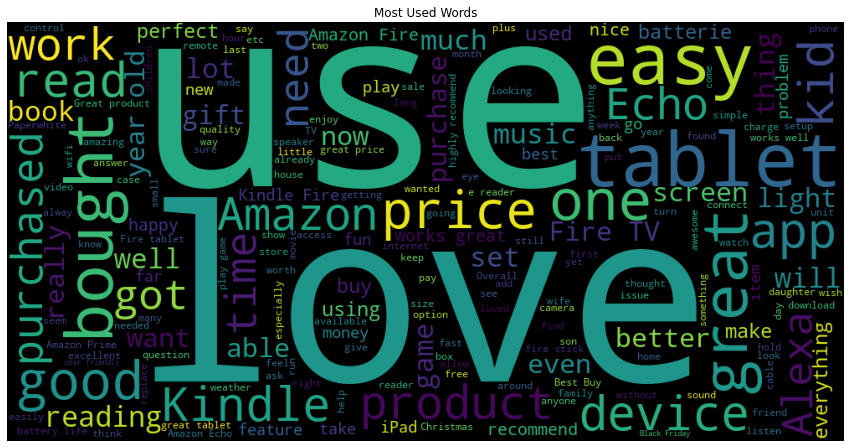

In [27]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Used Words")
plt.axis("off")
plt.show()

#### Positive Class

In [28]:
positiveWords=words = pd.Series(' '.join(df[df['sentiment']==1]['reviews.text']).split())

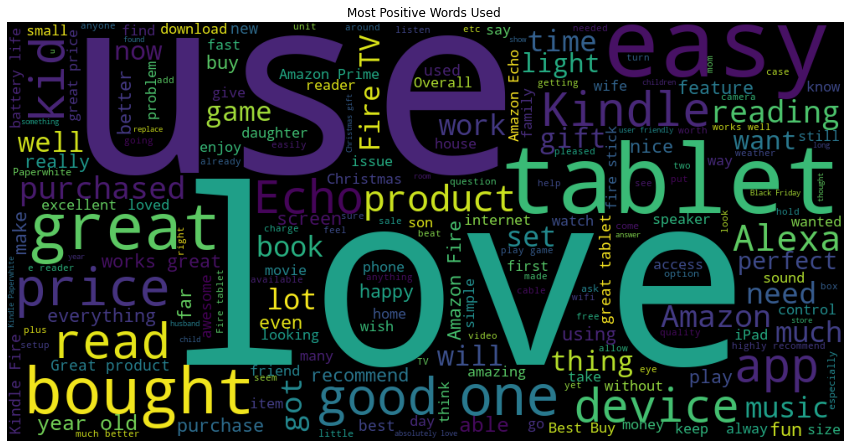

In [29]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Positive Words Used ")
plt.axis("off")
plt.show()

#### Negative Class

In [30]:
negativeWords=words = pd.Series(' '.join(df[df['sentiment']==0]['reviews.text']).split())

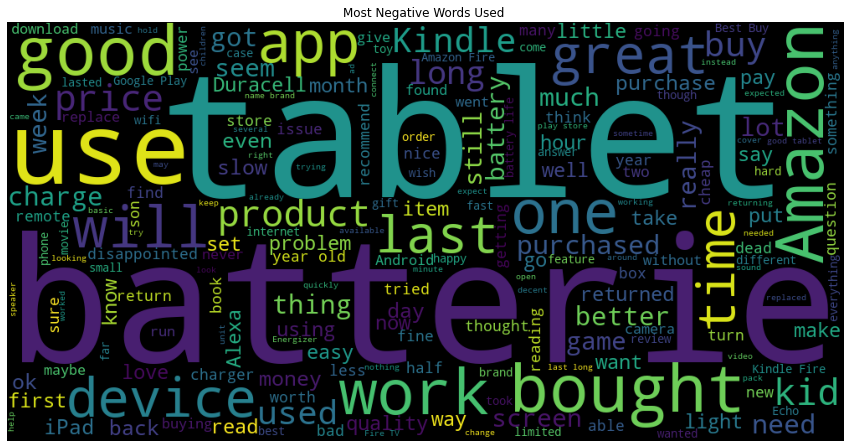

In [31]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Negative Words Used ")
plt.axis("off")
plt.show()

# Natural Language Processing

## Text Preprocessing

### Clean Text

In [32]:
def cleanString(text):
    text = text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text
cleanString('This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.')


'this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease '

In [33]:
stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(word in i for word in l):
        suitable_stopwords.append(i)
print(stopword_list)
print(suitable_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
suitable_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
                    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                    'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                    'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only',
                    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've",
                    'd', 'll', 'ma', 'm', 'o', 're', 've', 'y']
replace_list=['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

### Remove Stopwords

In [35]:

def remove_stopwords(stmt):
    filtered_sentence = []
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append('not')
    return " ".join(filtered_sentence)
remove_stopwords('this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease ')

'product far not disappointed children love use like ability monitor control content see ease'

### Lemmatize Text

In [36]:
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def lemmatize(text):
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)
    
lemmatize('product far not disappointed children love use like ability monitor control content see ease')

'product far not disappointed child love use like ability monitor control content see ease'

In [37]:
df['text']=df['reviews.text'].apply(cleanString)

In [38]:
df['text']=df['text'].apply(remove_stopwords)

In [39]:
df['text']=df['text'].apply(lemmatize)

In [40]:
df['reviews.text'].iloc[0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

In [41]:
df['text'].iloc[0]

'product far not disappointed child love use like ability monitor control content see ease'

## Feature Engineering and Selection

### Create TF-IDF

In [42]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(df['text'])
features = vectorizer.transform(df['text'])

features.toarray()

array([[0.351511, 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [43]:
df.iloc[0]

reviews.text      This product so far has not disappointed. My c...
reviews.rating                                                    5
sentiment                                                         1
text              product far not disappointed child love use li...
Name: 0, dtype: object

In [44]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

In [45]:
tf_idf.head()

,ability,able,absolutely,access,account,actually,ad,add,addition,additional,...,worry,worth,would,wrong,year,yes,yet,young,youtube,yr
0,0.351511,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.128464,0.0,0.145339,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.143334,0.0,0.0,0.0,0.0,0.0,0.187616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tf_idf.iloc[0]['ease']

0.3583056382408408

### Splitting Dataset into Train and Test Set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['sentiment'], test_size=0.2, random_state=42)

In [48]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(30181, 700)
Test Set Shape		:(7546, 700)


#### Test Classes count

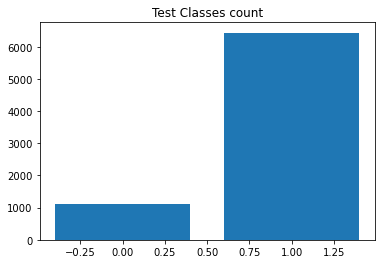

In [49]:
counts=y_test.value_counts()
plt.title("Test Classes count")
plt.bar(counts.index, counts.values)
plt.show()

#### Train Classes count

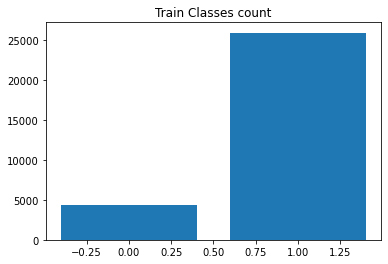

In [50]:
counts=y_train.value_counts()
plt.title("Train Classes count")
plt.bar(counts.index, counts.values)
plt.show()

In [51]:
yy=pd.DataFrame(y_train)

In [52]:
train_data = pd.concat([X_train,yy],axis=1)

In [53]:
train_data.head()

,ability,able,absolutely,access,account,actually,ad,add,addition,additional,...,worth,would,wrong,year,yes,yet,young,youtube,yr,sentiment
25313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414432,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
35729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Oversampling

In [54]:
target_count = train_data['sentiment'].value_counts()
negative_class = train_data[train_data['sentiment'] == 0]
positive_class = train_data[train_data['sentiment'] == 1]
negative_over = negative_class.sample(target_count[1], replace=True)
df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,ability,able,absolutely,access,account,actually,ad,add,addition,additional,...,worth,would,wrong,year,yes,yet,young,youtube,yr,sentiment
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.222263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
35431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [55]:
df_train_over['sentiment'].value_counts()

1    25875
0    25875
Name: sentiment, dtype: int64

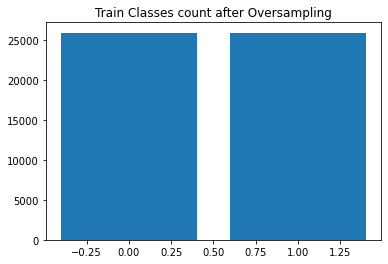

In [56]:
counts=df_train_over['sentiment'].value_counts()
plt.title("Train Classes count after Oversampling")
plt.bar(counts.index, counts.values)
plt.show()

In [57]:
X_train=df_train_over.iloc[:,:-1]
y_train=df_train_over['sentiment']

## Modeling

In [58]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix')
    import pickle 
    pickle.dump(model,open('Model.pkl','wb'))


## 1.Naive Bayes

In [59]:
model1 = MultinomialNB()

              precision    recall  f1-score   support

           0       0.48      0.82      0.60      1106
           1       0.96      0.85      0.90      6440

    accuracy                           0.84      7546
   macro avg       0.72      0.83      0.75      7546
weighted avg       0.89      0.84      0.86      7546

AUC  0.8330951725764604


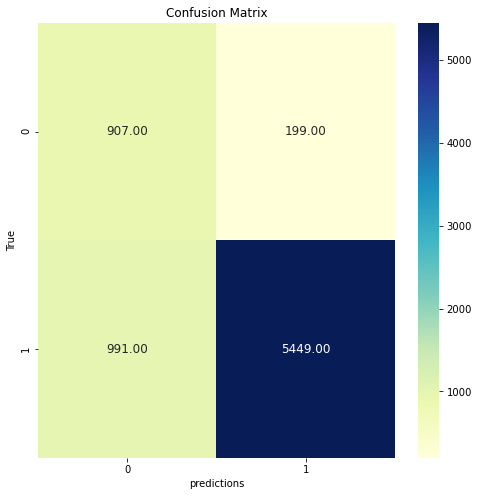

In [60]:
# Fitting classifier to the Training set (all features)
model1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model1.predict(X_test)

# Assign f1 score to a variable
print(classification_report(y_test, y_pred))
print ('AUC ',roc_auc_score(y_test, y_pred))
#cm = confusion_matrix(y_test, y_pred)
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
plt.figure(figsize = (8,8))

'''
cmapGR = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','green']
)
'''
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix')
import pickle 
pickle.dump(model1,open('Navie_model.pkl','wb'))

## 2.XGBoost

In [61]:
model2 = XGBClassifier()

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      1106
           1       0.97      0.90      0.93      6440

    accuracy                           0.89      7546
   macro avg       0.78      0.87      0.81      7546
weighted avg       0.91      0.89      0.90      7546

AUC  0.8657077993552952


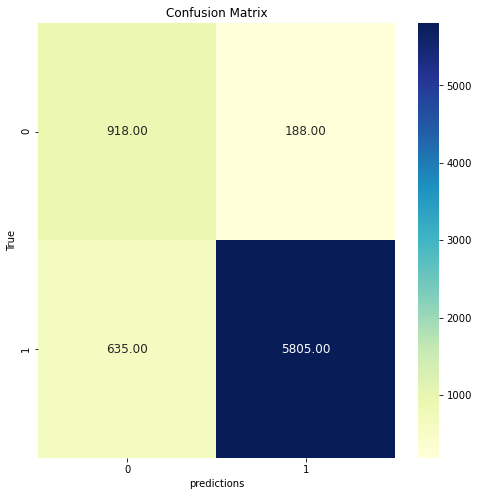

In [62]:
# Fitting classifier to the Training set (all features)
model2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model2.predict(X_test)

# Assign f1 score to a variable
print(classification_report(y_test, y_pred))
print ('AUC ',roc_auc_score(y_test, y_pred))
#cm = confusion_matrix(y_test, y_pred)
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
plt.figure(figsize = (8,8))

'''
cmapGR = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','green']
)
'''
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix')
import pickle 
pickle.dump(model2,open('xgboost_model.pkl','wb'))

# Realtime Output

In [88]:
text = 'This product not makes me feel very happy and i am not enjoying it'
xgb = pickle.load(open('xgboost_model.pkl','rb'))
text = cleanString(text)
text = remove_stopwords(text)
text = lemmatize(text)
test_features = vectorizer.transform([text])
df_text = pd.DataFrame(test_features.toarray(),  columns=vectorizer.get_feature_names())
xgb.predict(df_text)

array([0], dtype=int64)

In [89]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))